In [23]:
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def normalization2(x, y):
    mean_x=np.mean(x)
    mean_y=np.mean(y)
    scaled_x=x-mean_x
    scaled_y=y-mean_y
    return scaled_x, scaled_y

def normalization3(x, y, z):
    mean_x=np.mean(x)
    mean_y=np.mean(y)
    mean_z=np.mean(z)
    scaled_x=x-mean_x
    scaled_y=y-mean_y
    scaled_z=y-mean_z
    return scaled_x, scaled_y, scaled_z

In [3]:
def pca(matrix, d):
    n, p = matrix.shape
    print('维度：' + str(p))
    # 计算协方差矩阵
    average = np.mean(matrix, axis = 0)
    # 每个数据减去均值
    matrix = matrix - average
    cov = np.dot(matrix.T, matrix) / (n-1)
    cov = np.array(cov)
    print('协方差矩阵为：\n', cov)
    # 计算特征根与特征向量
    val, vec = np.linalg.eig(cov)
    
    # 选择最大的特征向量
    pairs = [(np.abs(val[i]), vec[:,i]) for i in range(len(val))]
    pairs.sort(reverse=True)
    feature = []
    for i in range(d):
        feature.append(pairs[i][1])
    feature = np.mat(feature)
    
    print(feature)
    
    new_data = np.dot(feature,data.T).T
    return new_data

In [4]:
x=np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1])
y=np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])
scaled_x, scaled_y = normalization2(x, y)
data=np.matrix([[scaled_x[i],scaled_y[i]] for i in range(len(scaled_x))])
new_data = pca(data, 1)
print(new_data)

维度：2
协方差矩阵为：
 [[0.61655556 0.61544444]
 [0.61544444 0.71655556]]
[[-0.6778734  -0.73517866]]
[[-0.82797019]
 [ 1.77758033]
 [-0.99219749]
 [-0.27421042]
 [-1.67580142]
 [-0.9129491 ]
 [ 0.09910944]
 [ 1.14457216]
 [ 0.43804614]
 [ 1.22382056]]


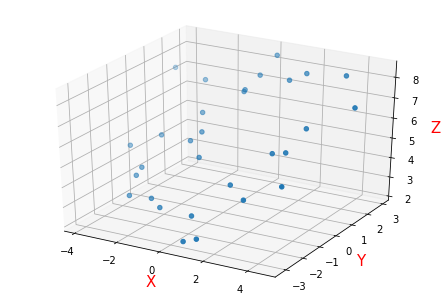

维度：3
协方差矩阵为：
 [[5.44627237 0.7092216  0.7092216 ]
 [0.7092216  3.39077506 3.39077506]
 [0.7092216  3.39077506 3.39077506]]
[[-0.47216892 -0.62332035 -0.62332035]
 [-0.88150809  0.33387384  0.33387384]]
[[-0.75417425  4.76022182]
 [-5.32887178  3.24052393]
 [-1.88222938  4.14376336]
 [-0.1788507  -1.27782037]
 [-4.04689275  6.55616267]
 [-8.35947794  0.4766504 ]
 [-4.3696443  -0.27682909]
 [-3.58729537  3.70799127]
 [-5.2548065   3.19847544]
 [-5.91282967 -0.37125898]
 [-3.76696386 -1.90572745]
 [-2.32084896  1.94932773]
 [-7.39350472  1.86476459]
 [-6.76133672  2.1617696 ]
 [-2.41533529 -1.21983522]
 [-2.450428   -0.19257886]
 [-7.10791613  3.61348132]
 [ 0.5533455   2.67551991]
 [-6.12109216  3.34889353]
 [ 0.23738401 -0.95091214]
 [-0.62656102 -0.19331218]
 [ 0.02103932  1.17531925]
 [-3.05911366  2.9170246 ]
 [-4.74450194 -0.67957644]
 [-2.51964139  2.92955116]
 [ 0.01882549  1.83018349]
 [-0.50815069  3.44146096]
 [-7.7240846  -1.09079871]
 [-4.53333035  5.00258588]
 [-0.1484229   

In [24]:
x = []
y = []
z = []
for i in range(30):
    x.append(random.gauss(5, 3))
for i in range(30):
    y.append(random.gauss(8, 2))
for i in range(30):
    z.append(random.gauss(3, 4))
scaled_x, scaled_y, scaled_z = normalization3(x, y, z)
data=np.matrix([[scaled_x[i],scaled_y[i], scaled_z[i]] for i in range(len(scaled_x))])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(scaled_x, scaled_y, scaled_z)
ax.set_zlabel('Z', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('Y', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('X', fontdict={'size': 15, 'color': 'red'})
plt.show()
new_data = pca(data, 2)
print(new_data)

### 图片压缩

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # mpimg 用于读取图片

In [6]:
def changeImage(path):
    img = Image.open(path)
    # 将图像转换成灰度图
    img = img.convert("L")
    width = img.size[0]
    height = img.size[1]
    data = img.getdata()
    # 为了避免溢出，对数据进行一个缩放，缩小100倍
    data = np.array(data).reshape(height,width)/100
    return data

In [7]:
def pca_pic(data,k):
    sample,featureNum = data.shape
    mean = np.array([np.mean(data[:,i]) for i in range(featureNum)]) # 求均值   
    normal_data = data - mean  # 去中心化
    # 得到协方差矩阵
    matri = np.dot(np.transpose(normal_data),normal_data)
    val,vec = np.linalg.eig(matri)
    # 求前k个向量
    index = np.argsort(val)
    vecIndex = index[:-(k+1):-1]
    feature = vec[:,vecIndex]
    #降维后的数据
    new_data = np.dot(normal_data,feature)
    # 图片显示需要还原到原空间而不是直接返回降维后的数据
    # 将降维后的数据映射回原空间
    rec_data = np.dot(new_data,np.transpose(feature))+ mean
    return rec_data

In [20]:
def error(data,recdata):
    sum1 = 0
    sum2 = 0
    D_value = data - recdata
    # 计算两幅图像之间的误差率，即信息丢失率
    for i in range(data.shape[0]):
        sum1 += np.dot(data[i],data[i])
        sum2 += np.dot(D_value[i], D_value[i])
    error = sum2/sum1
    return error

(338, 450, 3)


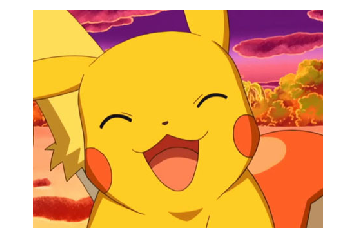

In [10]:
x = mpimg.imread('0.jpg')
print(x.shape)
plt.imshow(x) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

(338, 450)


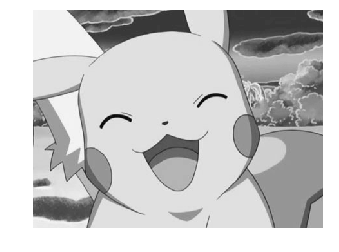

In [13]:
x = changeImage('0.jpg')
print(x.shape)
#print(x)
#显示图片
plt.imshow(x, cmap=plt.cm.gray) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

(0.011047401427167642+0j)
(0.005509545911150714+0j)
(0.0034291469792751437+0j)
(0.0023158294904146557+0j)


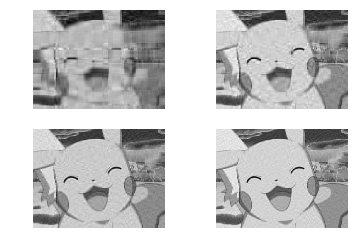

In [22]:
plt.subplot(2,2,1)
y = pca_pic(x, 10)
plt.imshow(y.real, cmap=plt.cm.gray) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.subplot(2,2,2)
print(error(x, y))
y = pca_pic(x, 20)
plt.imshow(y.real, cmap=plt.cm.gray) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.subplot(2,2,3)
print(error(x, y))
y = pca_pic(x, 30)
plt.imshow(y.real, cmap=plt.cm.gray) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.subplot(2,2,4)
print(error(x, y))
y = pca_pic(x, 40)
plt.imshow(y.real, cmap=plt.cm.gray) # 显示图片
plt.axis('off') # 不显示坐标轴
print(error(x, y))
plt.show()